In [7]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq

In [8]:
# 读入数据集
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# Reverse input? =================================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

In [9]:

# 设定超参数
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0


In [10]:
# Normal or Peeky? ==============================================
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [11]:
acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.49
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.20
| epoch 1 |  iter 61 / 351 | time 4[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 5[s] | loss 1.84
| epoch 1 |  iter 101 / 351 | time 7[s] | loss 1.80
| epoch 1 |  iter 121 / 351 | time 8[s] | loss 1.79
| epoch 1 |  iter 141 / 351 | time 10[s] | loss 1.77
| epoch 1 |  iter 161 / 351 | time 11[s] | loss 1.77
| epoch 1 |  iter 181 / 351 | time 13[s] | loss 1.76
| epoch 1 |  iter 201 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 221 / 351 | time 16[s] | loss 1.75
| epoch 1 |  iter 241 / 351 | time 17[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 19[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 20[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 21[s] | loss 1.73
| epoch 1 |  iter 321 / 351 | time 23[s] | loss 1.73
| epoch 1 |  iter 341 / 351 | time 25[s] | loss 1.73
Q 77+85  
T 162 
X 107 
---
Q 975+164
T 1139
X 1011
---
Q 5

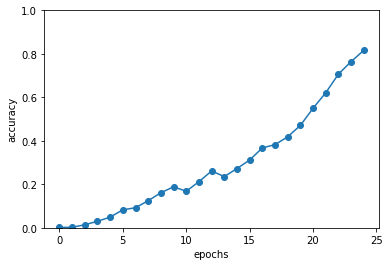

In [12]:
# 绘制图形
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

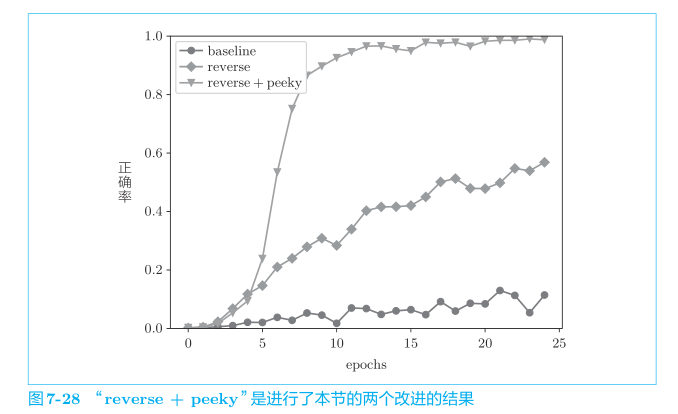